# School meals

School meal subsidies comprise the National School Lunch Program (NSLP) and the School Breakfast Program (SBP).
Eligibility depends on household size, state, income, and participation in other programs, and assigns children to either a *reduced* or *free* school meal subsidy tier.

## Eligibility

Children whose families have income below 130 percent of the federal poverty line, or who participate in SNAP, TANF, or the Food Distribution Program on Indian Reservations, are eligible for free breakfast and lunch at school.
Children who do not meet these criteria and whose families have income below 185 percent of the federal poverty line are eligible for a reduced school meal subsidy.
Other children receive a small meal subsidy from the federal government.

## Benefit value

We assign the benefit value as the federal reimbursement rates published by USDA.
We then multiply this by 180 school days per year.

## Examples

### One child

Consider a one-adult one-child household in California with \$1,000 monthly earned income.
They would be eligible for \$84 per month in school meal subsidies.

In [4]:
from openfisca_us import IndividualSim
import pandas as pd
import plotly.express as px

sim = IndividualSim(year=2022)
sim.add_person(name="parent", employment_income=1000 * 12)
sim.add_person(name="child", age=10, is_in_school=True)
sim.add_spm_unit(name="spm_unit", members=["parent", "child"], snap=0)

round(sim.calc("school_meal_subsidy")[0] / 12)

84

What if their earnings change?
They receive the maximum benefit of \$84 per month until they reach \$1,880 in monthly earnings, at which point it falls to \$74 per month until they reach \$2,690 per month, at which point it falls to \$10 per month, the minimum amount.

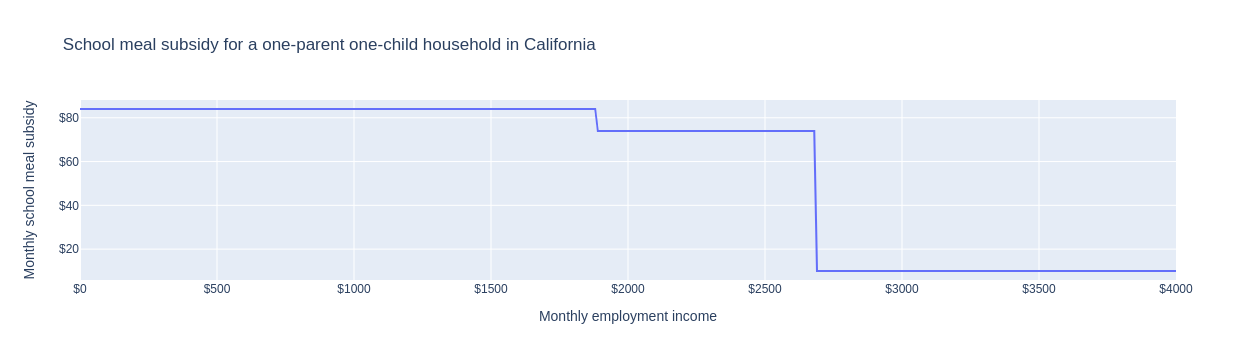

In [5]:
sim.vary("employment_income", max=4000 * 12, step=120)

import plotly.express as px

LABELS = dict(
    employment_income="Monthly employment income",
    school_meal_subsidy="Monthly school meal subsidy",
    mtr="Marginal tax rate",
)

df = pd.DataFrame(
    dict(
        employment_income=sim.calc("employment_income")[0],
        school_meal_subsidy=sim.calc("school_meal_subsidy")[0],
        # mtr=-sim.deriv("school_meal_subsidy", "employment_income"),
    )
)
df[["employment_income", "school_meal_subsidy"]] = (
    df[["employment_income", "school_meal_subsidy"]] / 12
).round()

fig = px.line(
    df,
    "employment_income",
    "school_meal_subsidy",
    labels=LABELS,
    title="School meal subsidy for a one-parent one-child household in California",
)
fig.update_layout(xaxis_tickformat="$", yaxis_tickformat="$")
fig.show()